# Image Processing for Human Faces

### a) Building the Dataset

In [9]:
import glob
import numpy as np
from PIL import Image

def build_dataset():
    org_dataset = []
    
    for i in range(1, 16):
        filelist = glob.glob('./yalefaces/subject'+str(i).zfill(2)+"*")
        for filename in filelist:
            image = np.array(Image.open(filename))
            image = image.reshape(image.shape[0]*image.shape[1])
            org_dataset.append(image)

    org_dataset = np.array(org_dataset)
    #print(org_dataset)
    return org_dataset

org_dataset = build_dataset()
num_components = len(org_dataset)

In [10]:
def normalize(org_dataset):
    mean_vector = np.mean(org_dataset, axis=0)
    dataset = org_dataset - mean_vector
    #print(dataset, mean_vector)
    return dataset, mean_vector

dataset, mean_vector = normalize(org_dataset)

In [12]:
from numpy import linalg
def calc_eigen_val_vec(dataset):
    cov_mat = np.dot(dataset, dataset.T)
    eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
    eigen_vectors = np.dot(dataset.T, eigen_vectors)
    for i in range(eigen_vectors.shape[1]):
        eigen_vectors[:, i] = eigen_vectors[:, i]/np.linalg.norm(eigen_vectors[:, i])
    return eigen_values.astype(float), eigen_vectors.astype(float)

eigen_values, eigen_vectors = calc_eigen_val_vec(dataset)

C:\Users\SAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [13]:
idx = eigen_values.argsort()[::-1] 
eigenvalues = eigen_values[idx]   
eigenvectors = eigen_vectors[:,idx]
#print("No of EigenValues:",len(eigenvalues))
#print("No of EigenVectors:",len(eigenvectors))

### b) i) Plot Curve Displaying K=166 Eigenvalues

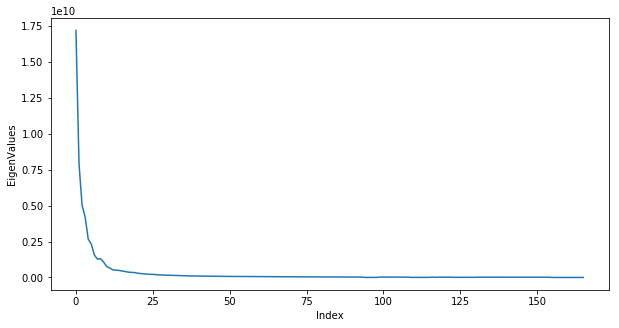

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(eigen_values[:])
plt.ylabel("EigenValues")
plt.xlabel("Index")
plt.show()

### b) ii) Components Capturing 50% Energy

In [18]:
from numpy import trapz
total_energy = np.trapz(eigen_values, dx=1)
print("Total Energy:", total_energy)
print("50% of Energy:", 0.5*total_energy)

k = 1
while True:
    k_sum = trapz(eigen_values[:k], dx=1)
    print("Energy Captured By", k, "Component:", k_sum)
    if k_sum >= 0.5*total_energy:
        break
    k += 1

print("No of Components to Capture 50% of Energy:", k)

Total Energy: 47844203159.94377
50% of Energy: 23922101579.971886
Energy Captured By 1 Component: 0.0
Energy Captured By 2 Component: 12562000164.468517
Energy Captured By 3 Component: 19028852315.07522
Energy Captured By 4 Component: 23630633160.81504
Energy Captured By 5 Component: 27061502258.779373
No of Components to Capture 50% of Energy: 5


### c) Top 10 Eigenfaces

In [20]:
def eigen_faces(eig_values, eig_vectors, k):
    k_eigen_val = eig_values.argsort()[-k:][::-1]
    eigen_faces = []
    for i in k_eigen_val:
        eigen_faces.append(eig_vectors[:, i])
    eigen_faces = np.array(eigen_faces)    
    return eigen_faces

eigen_faces = eigen_faces(eigen_values, eigen_vectors, num_components)

In [21]:
def orig_dim_eigenfaces(eigen_faces, mean_vector):
    org_dim_eigen_faces = []    
    for i in range(eigen_faces.shape[0]):
        org_dim_eigen_faces.append(eigen_faces[i].reshape(243, 320))
    org_dim_eigen_faces = np.array(org_dim_eigen_faces)    
    return org_dim_eigen_faces

org_dim_eigen_faces = orig_dim_eigenfaces(eigen_faces, mean_vector)

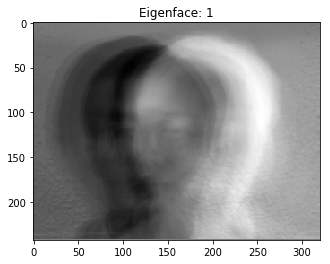

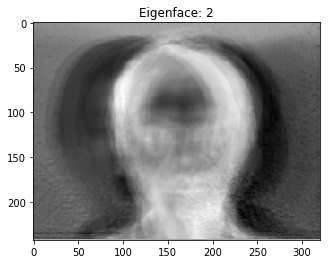

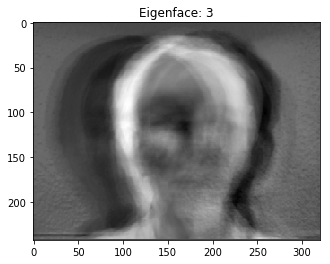

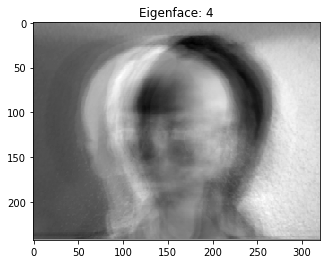

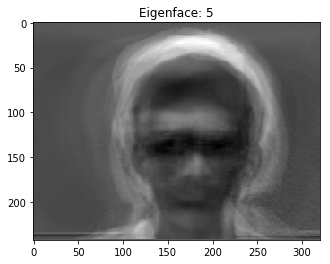

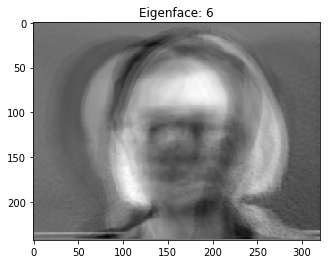

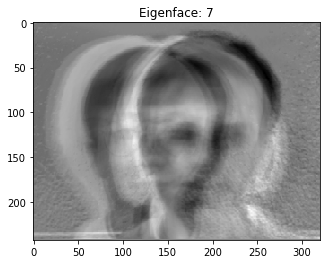

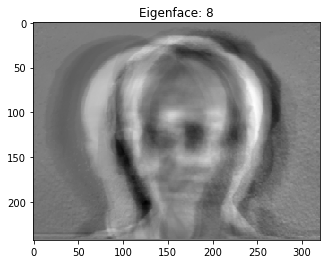

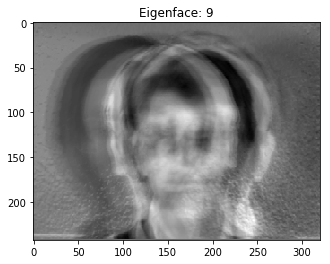

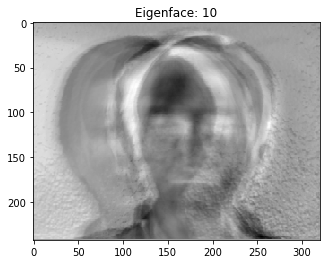

In [22]:
for i in range(10):
    plt.imshow(org_dim_eigen_faces[i], cmap = plt.get_cmap("gray"))
    plt.title("Eigenface: "+str(i+1))
    plt.show()

### d) Reconstruction of a Couple of Random Images

In [23]:
import random
import matplotlib.gridspec as gridspec
r1 = 0
r2 = 0
while r1==r2:
    r1 = random.randint(0, len(dataset)-1)
    r2 = random.randint(0, len(dataset)-1)
sample1 = dataset[r1]
sample2 = dataset[r2]

def projected_input(org_dim_input, eigen_faces):
    return np.dot(org_dim_input, eigen_faces.T)

def reconstructed_input(projected_input, eigen_faces):
    reconstructed_input = []
    reconstructed_input = np.dot(projected_input, eigen_faces)
    mean_vector = np.mean(org_dataset, axis=0)
    return reconstructed_input + mean_vector

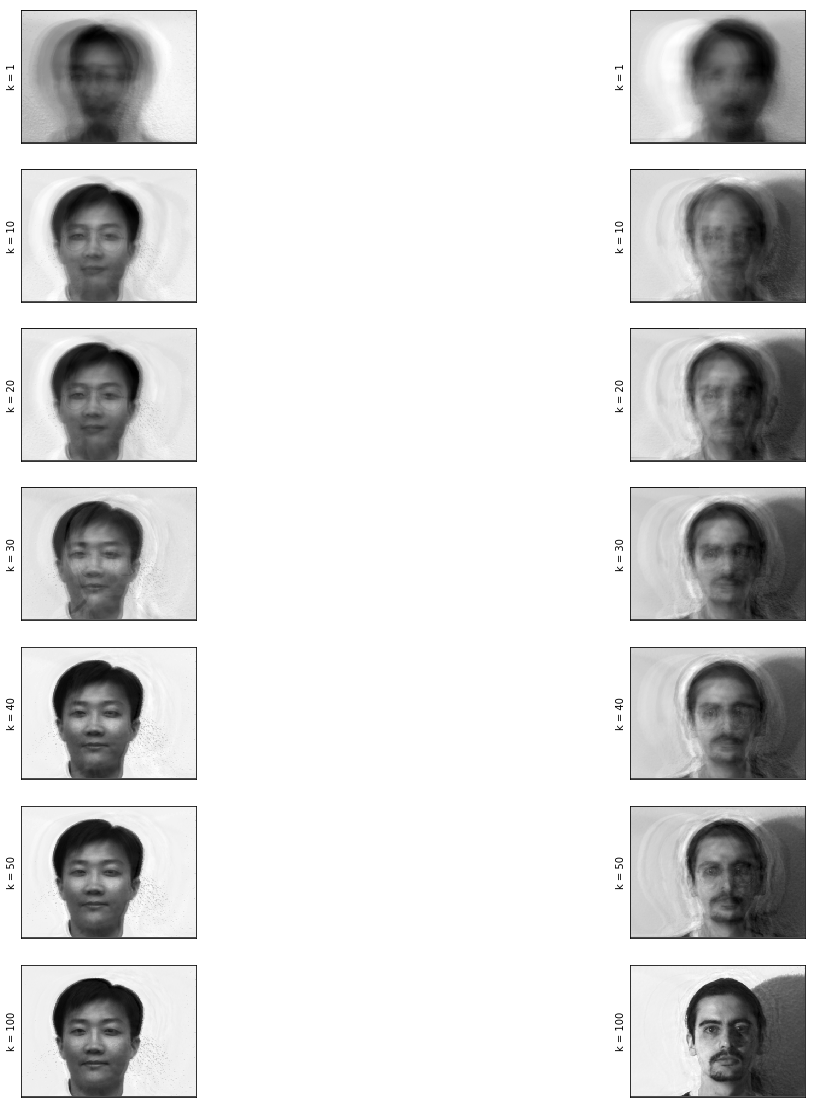

In [24]:
k = [1, 10, 20, 30, 40, 50, 100]
reconstructed_output = []
for img in k:
    projected_input1 = projected_input(sample1, eigen_faces[:img])
    reconstructed_input1 = reconstructed_input(projected_input1, eigen_faces[:img])
    reconstructed_output.append(reconstructed_input1)
    projected_input2 = projected_input(sample2, eigen_faces[:img])
    reconstructed_input2 = reconstructed_input(projected_input2, eigen_faces[:img])
    reconstructed_output.append(reconstructed_input2)

gs = gridspec.GridSpec(len(k), 2)   
plt.figure(figsize=(20,20))
i = 0
for g in gs:
    ax = plt.subplot(g)
    plt.ylabel("k = "+str(k[int(i/2)]))
    ax.imshow(reconstructed_output[i].reshape(243, 320), cmap = plt.get_cmap("gray"))
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1    

plt.show()

In [25]:
print("Clearly, k = 100: Provides a Visually Good Result")

Clearly, k = 100: Provides a Visually Good Result
